##### I would like to create Monte Carlo method, which would estimate PI-number value. To do this I will use numpy random number generator, create Chi-square test to see if it generates numbers from uniform distribution. Then I will generate many numbers and using coin toss method I will estimate area under quater of circle. With this I will then estiamte the PI value.


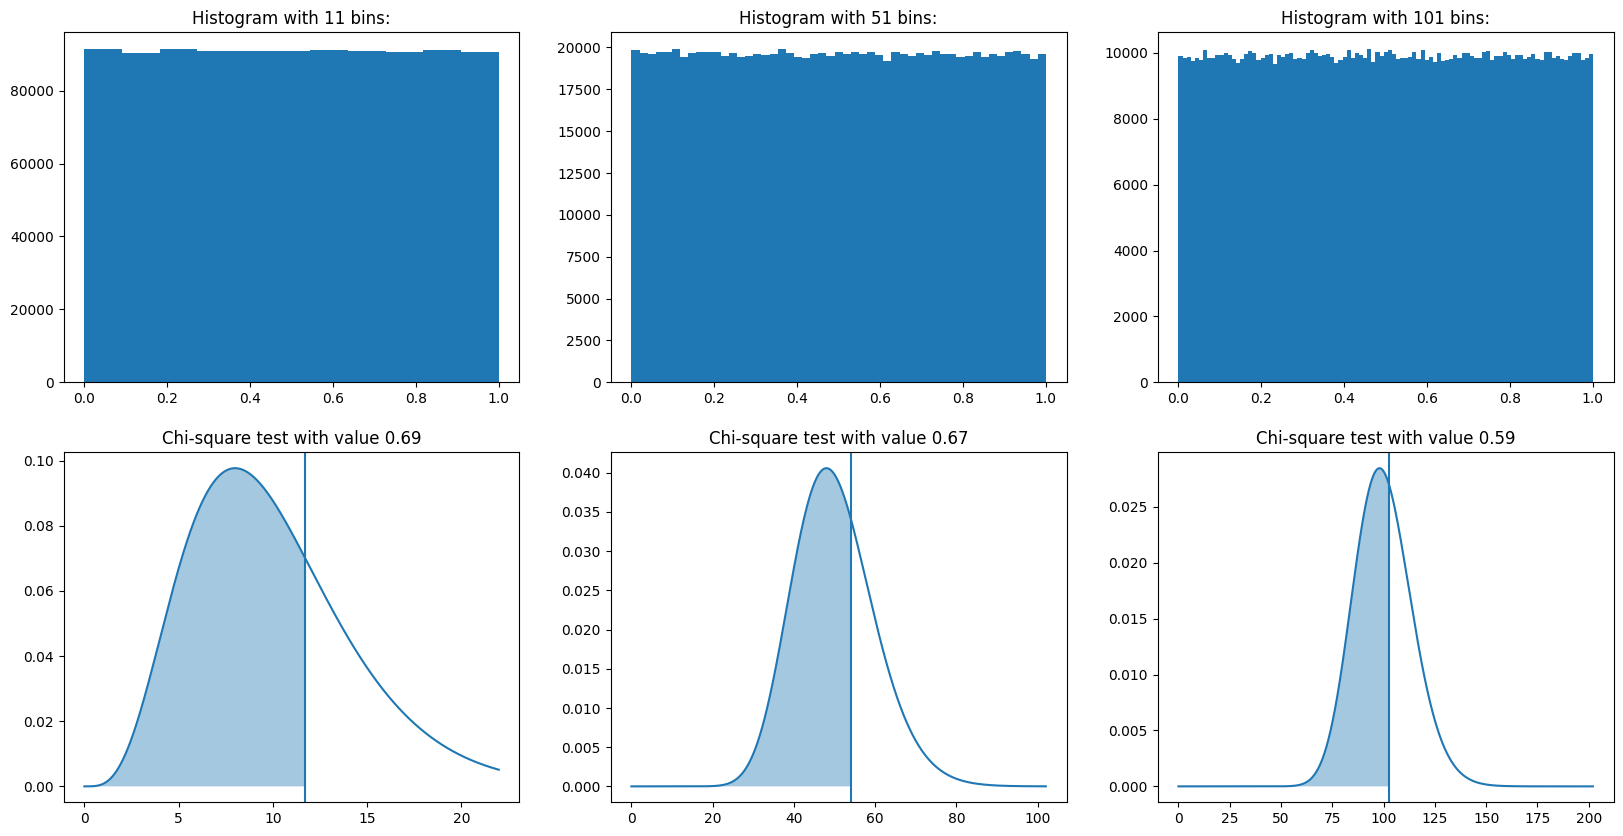

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2
bins_vector=[11,51,101]
N = 1000000
plot_nr = 1
fig = plt.figure(figsize=(20,10))
for nr_bins in bins_vector:
    p = 1/nr_bins
    probe = np.random.rand(N)

    plt.subplot(2, 3, plot_nr)
    counts = plt.hist(probe, nr_bins)
    plt.title(f'Histogram with {nr_bins} bins:')
    

    error = 0
    for n_in_box in counts[0]:
        error += (n_in_box - N*p)**2/(N*p)

    chi = chi2.cdf(error, nr_bins-1)

    x = np.arange(0, 2*nr_bins, 0.01)
    plt.subplot(2, 3, (plot_nr+3))
    plt.plot(x, chi2.pdf(x, df=nr_bins-1))
    plt.axvline(error)
    x = np.arange(0, error, 0.01)
    plt.fill_between(x, chi2.pdf(x, df=nr_bins-1), step="pre", alpha=0.4)
    plt.title(f'Chi-square test with value {chi:.2f}')

    plot_nr +=1
plt.show()




All test would have passed with p-value equal to 5%

##### Now it is time to estimate Pi-value

In [23]:

N = 1000
a = 1
b = 1
V = a*b
X = np.random.rand(N)
Y = np.random.rand(N)
def decide(x,y):
    if( (x**2 + y**2) < 1):
        return 1 
def count_M(X,Y,N):
    M=0
    for i in range(N):
        if decide(X[i],Y[i]):
            M+=1
    return M

def std(V,M,N):
    return V*np.sqrt((1/N)*(M/N)*(1-(M/N)))
def count_pi(M,N):
    return 4*M/N

def count_everything(X,Y,N):
    V=4
    M = count_M(X,Y,N)
    return count_pi(M,N), std(V,M,N)

In [24]:
df = pd.DataFrame(columns=['N', 'pi', 'std'])
#N= np.round(np.linspace(start=100, stop=1000000,num=nr_of_probes))
N = [20, 50, 200, 500, 2000, 5000, 20000, 50000, 200000, 500000]

for nr in N:
    M=0
    X = np.random.rand(nr)
    Y = np.random.rand(nr)
    pi, st_dev = count_everything(X,Y,nr)
    df = pd.concat([df, pd.DataFrame({'N':[nr], 'pi':[pi], 'std':[st_dev]})])



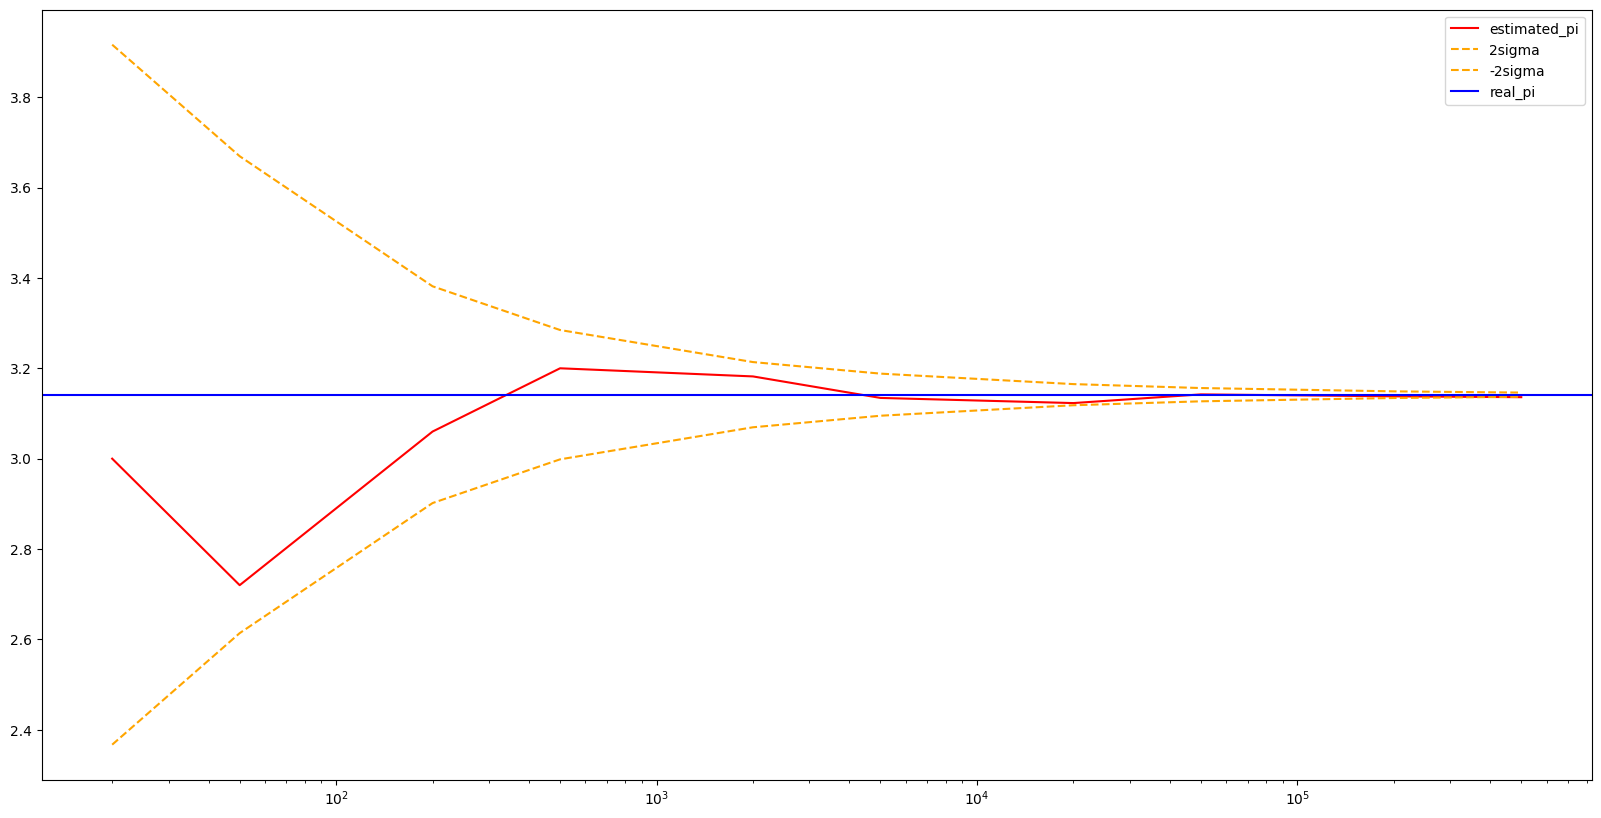

In [25]:
plt.figure(figsize=(20,10))
plt.semilogx(df['N'], df['pi'], 'red', label='estimated_pi')
plt.semilogx(df['N'], 2*df['std']+np.pi,'--', color = 'orange', label='2sigma')
plt.semilogx(df['N'], -2*df['std']+np.pi,'--', color = 'orange', label = '-2sigma')
plt.axhline(np.pi, color='blue', label = 'real_pi')
plt.legend()

plt.show()

Here we can see how my estimator works depending on how many numbers were generated to estiamte it value. We can also see that the estimated value does not exeed 2sigma, -2sigma interval and tht means that it achieved ~95% accuracy